# Tutorial

Hydrocron is an API developed at PO.DAAC to enable time series analysis of hydrology features observed by the [Surface Water and Ocean Topography](https://swot.jpl.nasa.gov/) (SWOT) satellite.

SWOT River data is archived and distributed as zipped [shapefiles](https://en.wikipedia.org/wiki/Shapefile). These files are organized by passes of the SWOT satellite over continents, so each zip file contains many river features at one observation time. To analyze how a particular river is changing over time, you would then need to extract data for a single feature from many files. Hydrocron allows a user to specify the id of the single feature of interest, and will retrieve all of the observations for that feature in the time range specified. 


### How it works

Hydrocron is powered by AWS, using API Gateway, Lambda functions, DynamoDB tables, and SNS notifications. As data is ingested into the PO.DAAC archive, the shapefiles are unpacked and each river reach and node feature is added to a database. Users can then query the API for features using the known reach_id and node_id from the [SWOT River Database (SWORD)](https://www.swordexplorer.com/), as well as a time range of interest, and all observations within the time range of the feature of interest will be returned in geojson or csv format.

Hydrocron is an open source tool developed to support open science, and can be found on Github at [https://github.com/podaac/hydrocron](https://github.com/podaac/hydrocron)

Full documentation describing the API parameters, available fields, and response codes is available at [https://podaac.github.io/hydrocron/intro.html](https://podaac.github.io/hydrocron/intro.html)

# Example 1 - Display a river reach on a map with geojson

In [1]:
import folium
import requests
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt

Send a request to Hydrocron with the following parameters:

https://soto.podaac.earthdatacloud.nasa.gov/hydrocron/v1/timeseries?

    feature=Reach  
    feature_id=53151000375  
    start_time=2024-01-01T00:00:00Z  
    end_time=2024-03-30T00:00:00Z  
    output=geojson  
    fields=reach_id,time_str,wse,width,geometry

In [2]:

hydrocron_response = requests.get(
    "https://soto.podaac.earthdatacloud.nasa.gov/hydrocron/v1/timeseries?feature=Reach&feature_id=53151000375&start_time=2024-01-01T00:00:00Z&end_time=2024-03-30T00:00:00Z&output=geojson&fields=reach_id,time_str,wse,width,geometry"
).json()

hydrocron_response

{'status': '200 OK',
 'time': 2573.59,
 'hits': 7,
 'results': {'csv': '',
  'geojson': {'type': 'FeatureCollection',
   'features': [{'id': '0',
     'type': 'Feature',
     'properties': {'reach_id': '53151000375',
      'time_str': '2024-01-25T03:21:55Z',
      'wse': '2.0944',
      'width': '136.535662',
      'wse_units': 'm',
      'width_units': 'm'},
     'geometry': {'type': 'LineString',
      'coordinates': [[142.235319, -8.956718],
       [142.235592, -8.956717],
       [142.235865, -8.956716],
       [142.236137, -8.956607],
       [142.23641, -8.956552],
       [142.236683, -8.956496],
       [142.236955, -8.956441],
       [142.237228, -8.95644],
       [142.237501, -8.956385],
       [142.237774, -8.95633],
       [142.238046, -8.956275],
       [142.238319, -8.956274],
       [142.238592, -8.956219],
       [142.238864, -8.956164],
       [142.239137, -8.956108],
       [142.23941, -8.956107],
       [142.239682, -8.955998],
       [142.239955, -8.955943],
       [142

In [3]:
# extract just the geojson to plot on the map

geojson_data = hydrocron_response['results']['geojson']

geojson_data

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {'reach_id': '53151000375',
    'time_str': '2024-01-25T03:21:55Z',
    'wse': '2.0944',
    'width': '136.535662',
    'wse_units': 'm',
    'width_units': 'm'},
   'geometry': {'type': 'LineString',
    'coordinates': [[142.235319, -8.956718],
     [142.235592, -8.956717],
     [142.235865, -8.956716],
     [142.236137, -8.956607],
     [142.23641, -8.956552],
     [142.236683, -8.956496],
     [142.236955, -8.956441],
     [142.237228, -8.95644],
     [142.237501, -8.956385],
     [142.237774, -8.95633],
     [142.238046, -8.956275],
     [142.238319, -8.956274],
     [142.238592, -8.956219],
     [142.238864, -8.956164],
     [142.239137, -8.956108],
     [142.23941, -8.956107],
     [142.239682, -8.955998],
     [142.239955, -8.955943],
     [142.240228, -8.955888],
     [142.240501, -8.955887],
     [142.240773, -8.955832],
     [142.241046, -8.955831],
     [142.241319, -8.955776],
   

In [4]:
# Set up the map using Folium (https://python-visualization.github.io/folium/latest/)
map = folium.Map(tiles="cartodbpositron")

# add the geojson from Hydrocron to the map
folium.GeoJson(geojson_data, name='SWOT River Reach').add_to(map)
folium.LayerControl().add_to(map)

# zoom to the river feature we added
map.fit_bounds(map.get_bounds(), padding=(30, 30))

map

# Example 2 - Time series analysis of river reach with CSV

Hydrocron also returns data in CSV format. Sending a similar request:


https://soto.podaac.earthdatacloud.nasa.gov/hydrocron/v1/timeseries?
    
    feature=Reach
    feature_id=53151000375
    start_time=2024-01-01T00:00:00Z
    end_time=2024-03-30T00:00:00Z
    output=csv
    fields=reach_id,time_str,wse,width

Tip: if you don't need to plot the feature on a map, omit the geometry field to make the response size smaller

In [5]:
hydrocron_response = requests.get(
    "https://soto.podaac.earthdatacloud.nasa.gov/hydrocron/v1/timeseries?feature=Reach&feature_id=53151000375&start_time=2024-01-01T00:00:00Z&end_time=2024-03-30T00:00:00Z&output=csv&fields=reach_id,time_str,wse,width"
).json()

hydrocron_response

{'status': '200 OK',
 'time': 702.32,
 'hits': 7,
 'results': {'csv': 'reach_id,time_str,wse,width,wse_units,width_units\n53151000375,2024-01-25T03:21:55Z,2.0944,136.535662,m,m\n53151000375,2024-01-29T14:27:50Z,-1.6521,48.270187,m,m\n53151000375,2024-02-15T00:07:00Z,1.9637,107.174234,m,m\n53151000375,2024-02-19T11:12:55Z,-3.0532,38.60191,m,m\n53151000375,2024-03-06T20:52:04Z,-1.1387,48.492057,m,m\n53151000375,2024-03-11T07:57:58Z,1.4811,49.924515,m,m\n53151000375,2024-03-27T17:37:08Z,-0.7693,43.192787,m,m\n',
  'geojson': {}}}

In [6]:

csv_str = hydrocron_response['results']['csv']

csv_str


'reach_id,time_str,wse,width,wse_units,width_units\n53151000375,2024-01-25T03:21:55Z,2.0944,136.535662,m,m\n53151000375,2024-01-29T14:27:50Z,-1.6521,48.270187,m,m\n53151000375,2024-02-15T00:07:00Z,1.9637,107.174234,m,m\n53151000375,2024-02-19T11:12:55Z,-3.0532,38.60191,m,m\n53151000375,2024-03-06T20:52:04Z,-1.1387,48.492057,m,m\n53151000375,2024-03-11T07:57:58Z,1.4811,49.924515,m,m\n53151000375,2024-03-27T17:37:08Z,-0.7693,43.192787,m,m\n'

In [7]:
df = pd.read_csv(StringIO(csv_str))

df

,reach_id,time_str,wse,width,wse_units,width_units
0,53151000375,2024-01-25T03:21:55Z,2.0944,136.535662,m,m
1,53151000375,2024-01-29T14:27:50Z,-1.6521,48.270187,m,m
2,53151000375,2024-02-15T00:07:00Z,1.9637,107.174234,m,m
3,53151000375,2024-02-19T11:12:55Z,-3.0532,38.601910,m,m
4,53151000375,2024-03-06T20:52:04Z,-1.1387,48.492057,m,m
5,53151000375,2024-03-11T07:57:58Z,1.4811,49.924515,m,m
6,53151000375,2024-03-27T17:37:08Z,-0.7693,43.192787,m,m


In [8]:
df.time_str = pd.to_datetime(df.time_str)

Text(0.5, 1.0, 'Water Surface Elevation from Hydrocron for River Reach: 53151000375')

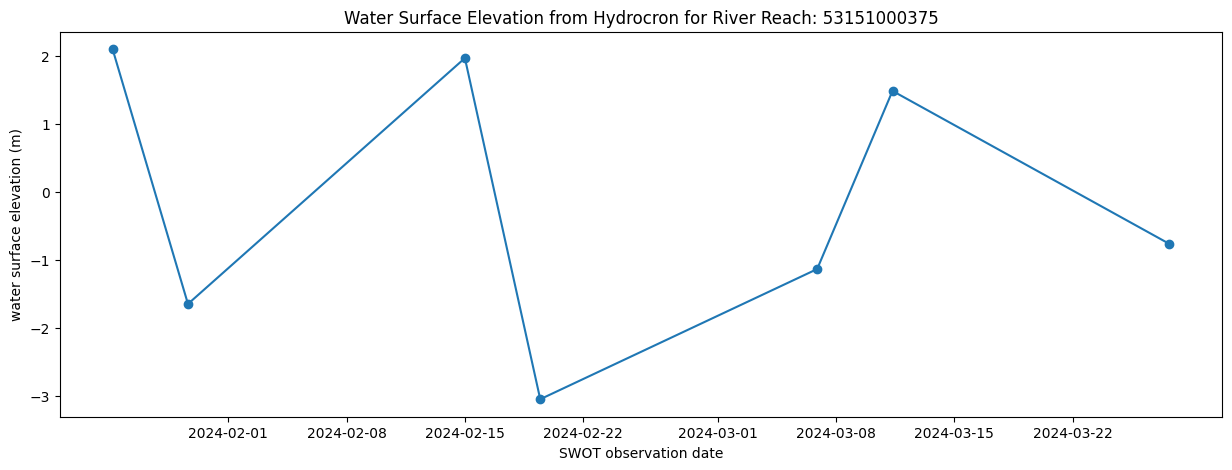

In [9]:
fig = plt.figure(figsize=(15,5))

plt.plot(df.time_str, df.wse, marker='o')

plt.ylabel('water surface elevation (m)')
plt.xlabel('SWOT observation date')

plt.title('Water Surface Elevation from Hydrocron for River Reach: ' + str(df.reach_id[0]))
